<a href="https://colab.research.google.com/github/rbarbanell/HW3-4/blob/master/Applied_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import linalg
import sympy as sp
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
from numpy import diff



# 1.) Find a cubic spline through the points (1, 2), (3, 4), (5, −1), and (7, 0). Use the standard requirement that the second derivative of the functions at the first and last points should be 0.

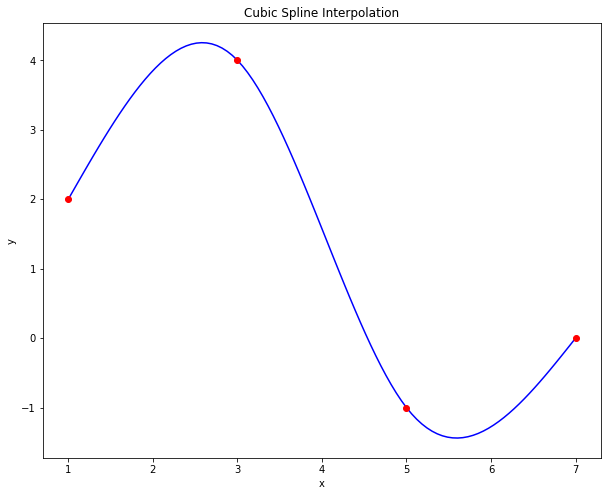

In [ ]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

x = [1,3,5,7]
y = [2,4,-1,0]


f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(7, 1, 100)
y_new = f(x_new)

plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()




# 2.) Write a Python program to find a cubic spline through any four points (a, b), (c, d),
#(i, j), and (p, q) in the plane. Again use the requirement that the second derivative of the functions at the first and last points should be 0. Don’t use the built in
#CubicSpline function, generate your equations and use Python to solve the corresponding system of linear equations.

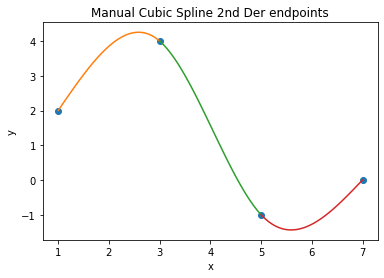

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The x, y pairs of points to fit
x = [1,3,5,7]
y = [2,4,-1,0]

# Matrix of x values for the equation ax^3+bx^2+cx+d
A = np.array([
	# 6 rows to solve f_1, f_2, f_3
	[x[0]**3, x[0]**2, x[0], 1, 0, 0, 0, 0, 0, 0, 0, 0],	# f_1(x_1) 
	[x[1]**3, x[1]**2, x[1], 1, 0, 0, 0, 0, 0, 0, 0, 0],	# f_1(x_2)
	[0, 0, 0, 0, x[1]**3, x[1]**2, x[1], 1, 0, 0, 0, 0], 	# f_2(x_2)
	[0, 0, 0, 0, x[2]**3, x[2]**2, x[2], 1, 0, 0, 0, 0], 	# f_2(x_3)
	[0, 0, 0, 0, 0, 0, 0, 0, x[2]**3, x[2]**2, x[2], 1], 	# f_3(x_3)
	[0, 0, 0, 0, 0, 0, 0, 0, x[3]**3, x[3]**2, x[3], 1], 	# f_3(x_4)
	# 2 rows to solve first derivatives at connection points
	[3*x[1]**2, 2*x[1], 1, 0, -3*x[1]**2, -2*x[1], -1, 0, 0, 0, 0, 0],	# f_1'(x_2) - f_2'(x_2) = 0
	[0, 0, 0, 0, 3*x[2]**2, 2*x[2], 1, 0, -3*x[2]**2, -2*x[2], -1, 0],	# f_2'(x_3) - f_3'(x_3) = 0
	# 2 rows to solve second derivatives at connection points
	[6*x[1], 2, 0, 0, -6*x[1], -2, 0, 0, 0, 0, 0, 0],  # f_1"(x_2) - f_2"(x_2) = 0
	[0, 0, 0, 0, 6*x[2], 2, 0, 0, -6*x[2], -2, 0, 0],  # f_1"(x_2) - f_2"(x_2) = 0
	# 2 rows to describe the endpoints, which should have 2nd derivative = 0
	[6*x[0], 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # f_1"(x_1) = 0
	[0, 0, 0, 0, 0, 0, 0, 0, 6*x[3], 2, 0, 0]		# f_3"(x_4) = 0
])

# Make a vector of the solution for each row and solve
B = np.array([y[0], y[1], y[1], y[2], y[2], y[3], 0, 0, 0, 0, 0, 0])
solution = np.linalg.solve(A,B)

# Create 3 functions from solution
f1 = np.poly1d(solution[0:4])
f2 = np.poly1d(solution[4:8])
f3 = np.poly1d(solution[8:12])

# Make 3 lines for each function and plot
x1 = np.linspace(x[0], x[1])
y1 = f1(x1)

x2 = np.linspace(x[1],x[2])
y2 = f2(x2)

x3 = np.linspace(x[2],x[3])
y3 = f3(x3)

plt.title("Manual Cubic Spline 2nd Der endpoints") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.plot(x,y, 'o')
plt.plot(x1,y1,'-')
plt.plot(x2,y2,'-')
plt.plot(x3,y3,'-')
plt.show()

# 3.) Modify your program to make the first derivative, not the second derivative, of the
#functions at the first and last points 0. Write a sentence about the qualitative difference
#between the graphs you got in this part and in part 3.

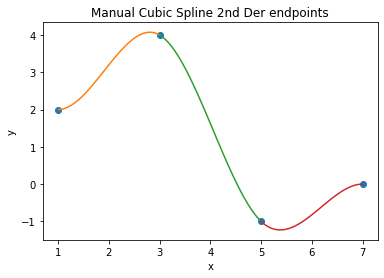

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# The x, y pairs of points to fit
x = [1,3,5,7]
y = [2,4,-1,0]

# Matrix of x values for the equation ax^3+bx^2+cx+d
A = np.array([
	# 6 rows to solve f_1, f_2, f_3
	[x[0]**3, x[0]**2, x[0], 1, 0, 0, 0, 0, 0, 0, 0, 0],	# f_1(x_1) 
	[x[1]**3, x[1]**2, x[1], 1, 0, 0, 0, 0, 0, 0, 0, 0],	# f_1(x_2)
	[0, 0, 0, 0, x[1]**3, x[1]**2, x[1], 1, 0, 0, 0, 0], 	# f_2(x_2)
	[0, 0, 0, 0, x[2]**3, x[2]**2, x[2], 1, 0, 0, 0, 0], 	# f_2(x_3)
	[0, 0, 0, 0, 0, 0, 0, 0, x[2]**3, x[2]**2, x[2], 1], 	# f_3(x_3)
	[0, 0, 0, 0, 0, 0, 0, 0, x[3]**3, x[3]**2, x[3], 1], 	# f_3(x_4)
	# 2 rows to solve first derivatives at connection points
	[3*x[1]**2, 2*x[1], 1, 0, -3*x[1]**2, -2*x[1], -1, 0, 0, 0, 0, 0],	# f_1'(x_2) - f_2'(x_2) = 0
	[0, 0, 0, 0, 3*x[2]**2, 2*x[2], 1, 0, -3*x[2]**2, -2*x[2], -1, 0],	# f_2'(x_3) - f_3'(x_3) = 0
	# 2 rows to solve second derivatives at connection points
	[6*x[1], 2, 0, 0, -6*x[1], -2, 0, 0, 0, 0, 0, 0],  # f_1"(x_2) - f_2"(x_2) = 0
	[0, 0, 0, 0, 6*x[2], 2, 0, 0, -6*x[2], -2, 0, 0],  # f_1"(x_2) - f_2"(x_2) = 0
	# 2 rows to describe the endpoints, which should have 2nd derivative = 0
	[3*x[0]**2, 2*x[0], 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # f_1"(x_1) = 0
	[0, 0, 0, 0, 0, 0, 0, 0, 3*x[3]**2, 2*x[3], 1, 0]		# f_3"(x_4) = 0
])

# Make a vector of the solution for each row and solve
B = np.array([y[0], y[1], y[1], y[2], y[2], y[3], 0, 0, 0, 0, 0, 0])
solution = np.linalg.solve(A,B)

# Create 3 functions from solution
f1 = np.poly1d(solution[0:4])
f2 = np.poly1d(solution[4:8])
f3 = np.poly1d(solution[8:12])

# Make 3 lines for each function and plot
x1 = np.linspace(x[0], x[1])
y1 = f1(x1)

x2 = np.linspace(x[1],x[2])
y2 = f2(x2)

x3 = np.linspace(x[2],x[3])
y3 = f3(x3)

plt.title("Manual Cubic Spline 2nd Der endpoints") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.plot(x,y, 'o')
plt.plot(x1,y1,'-')
plt.plot(x2,y2,'-')
plt.plot(x3,y3,'-')
plt.show()



# 4.) Write a sentence about the qualitative difference
# between the graphs you got in this part and in part 3.

The last two rows in matrix A describs the end points for a functions 1 and 3. Setting the first derivitive = 0, results in a flat line "zero slope" while seting the second derivitive =0 results in "naturally" slope exit. 

